In [124]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

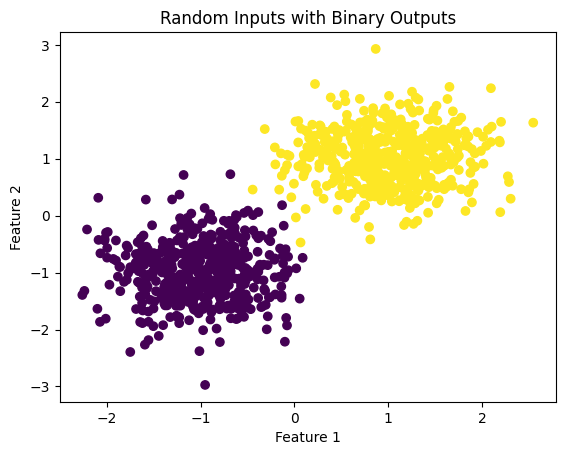

In [125]:
# Generate X values for cluster 1
X1 = np.random.normal(loc=[-1, -1], scale=0.5, size=(500, 2))

# Generate X values for cluster 2
X2 = np.random.normal(loc=[1, 1], scale=0.5, size=(500, 2))

# Combine X values from both clusters
X = np.concatenate((X1, X2))

# Create y array with binary outputs (0 or 1)
y = np.concatenate((np.zeros(500), np.ones(500)))

# Create a scatter plot of X with color-coded points based on y
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Inputs with Binary Outputs')
plt.show()

In [126]:
import numpy as np

def sigmoid(z):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-z))

def cross_entropy_loss(y_true, y_pred):
    """Cross-entropy loss error function"""
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def sigmoid_gradient(z):
    """Gradient of the sigmoid function"""
    return sigmoid(z) * (1 - sigmoid(z))


In [117]:
def logistic_regression(X, y, num_iterations, learning_rate):
    num_samples, num_features = X.shape
    
    # Initialize weights and bias to zero
    weights = np.zeros(num_features)+5
    bias = 0
    
    # Initialize lists to store the weights and biases at each iteration
    weights_history = [weights]
    bias_history = [bias]
    
    # Gradient descent
    for i in range(num_iterations):
        # Compute predictions and errors
        y_pred = sigmoid(np.dot(X, weights) + bias)
        errors = y_pred - y
        
        # Update weights and bias using gradient descent
        weights -= learning_rate * np.dot(X.T, errors) / num_samples
        bias -= learning_rate * np.sum(errors) / num_samples
        
        # Append current weights and bias to the history lists
        weights_history.append(weights)
        bias_history.append(bias)
    
    return weights, bias, weights_history, bias_history

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


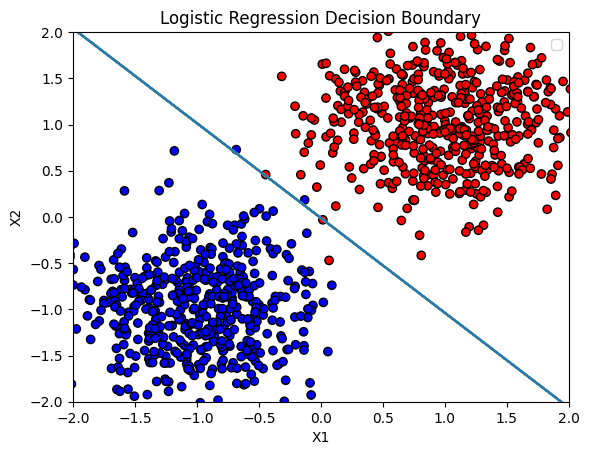

In [127]:
# Run logistic regression
num_iterations = 1000
learning_rate = 0.1
weights, bias, weight_history, bias_history = logistic_regression(X, y, num_iterations, learning_rate)

# Plot decision boundary
x1 = np.linspace(-2, 2, 100)
x2 = -(weights[0] * x1 + bias) / weights[1]

for i, w in enumerate(weight_history):
    if i % 100 == 0:
        y_pred = sigmoid(np.dot(X, w) + bias)
        accuracy = np.mean((y_pred >= 0.5) == y.reshape(-1, 1))
        plt.plot(x1, -(w[0] * x1 + bias) / w[1])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.show()

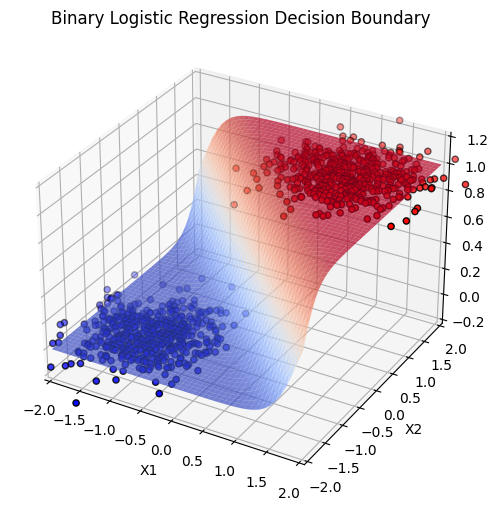

In [128]:
# Plot 3D surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create grid for surface plot
x1 = np.linspace(-2, 2, 50)
x2 = np.linspace(-2, 2, 50)
x1, x2 = np.meshgrid(x1, x2)
y_pred = sigmoid(weights[0] * x1 + weights[1] * x2 + bias)

# Plot surface
surf = ax.plot_surface(x1, x2, y_pred, cmap='coolwarm', alpha=0.7)

# Plot data points
ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='bwr', edgecolors='k')

# Set plot limits and labels
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-0.2, 1.2)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Binary Logistic Regression Decision Boundary')


plt.show()

In [129]:
# Run logistic regression
num_iterations = 100
learning_rate = 0.1
weights, bias, weights_history, bias_history = logistic_regression(X, y, num_iterations, learning_rate)

# Print gradient values for first three iterations
for i in range(num_iterations):
    print(f"Iteration {i+1}:")
    grad_weights = np.dot(X.T, sigmoid(np.dot(X, weights_history[i]) + bias_history[i]) - y) / len(X)
    grad_bias = np.mean(sigmoid(np.dot(X, weights_history[i]) + bias_history[i]) - y)
    print(f"Gradient w: {grad_weights}")
    print(f"w: {weights_history[i]}")
    print(f"Gradient b: {grad_bias}\n")

Iteration 1:
Gradient w: [-1.41569359e-03 -7.82173847e-05]
w: [5.01424463 5.00075854]
Gradient b: -0.000689924677738925

Iteration 2:
Gradient w: [-1.41573727e-03 -7.81846079e-05]
w: [5.01424463 5.00075854]
Gradient b: -0.000689654091542395

Iteration 3:
Gradient w: [-1.41578094e-03 -7.81518435e-05]
w: [5.01424463 5.00075854]
Gradient b: -0.000689383577220517

Iteration 4:
Gradient w: [-1.41582460e-03 -7.81190914e-05]
w: [5.01424463 5.00075854]
Gradient b: -0.0006891131347408365

Iteration 5:
Gradient w: [-1.41586826e-03 -7.80863515e-05]
w: [5.01424463 5.00075854]
Gradient b: -0.0006888427640709383

Iteration 6:
Gradient w: [-1.4159119e-03 -7.8053624e-05]
w: [5.01424463 5.00075854]
Gradient b: -0.0006885724651784014

Iteration 7:
Gradient w: [-1.41595554e-03 -7.80209088e-05]
w: [5.01424463 5.00075854]
Gradient b: -0.0006883022380308446

Iteration 8:
Gradient w: [-1.41599917e-03 -7.79882058e-05]
w: [5.01424463 5.00075854]
Gradient b: -0.0006880320825958863

Iteration 9:
Gradient w: [-1.